In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
BMI = pd.read_csv("C:\Adam\Coding\SciPy\BMI.csv")

In [3]:
BMI.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


## Checking CSV file for invalid data

In [4]:
BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
BMI.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

# Cleaning Data


In [6]:
BMI.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [7]:
BMI["Index"].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

C:\Adam\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index', ylabel='count'>

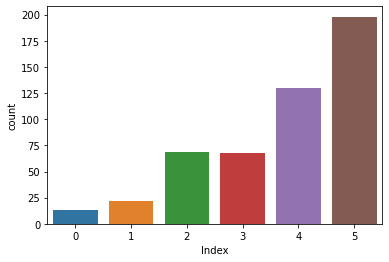

In [8]:
sns.countplot(BMI["Index"])

In [9]:
# Change Gender to 1=male 0=female
label_Gender = LabelEncoder()

In [10]:
BMI["Gender"] = label_Gender.fit_transform(BMI["Gender"])

In [11]:
BMI.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [12]:
# Seperate index from data set
X = BMI.drop("Index",axis=1) # All data without Index column
y = BMI["Index"]

In [13]:
# Train and split that data into test and training data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# Scale data
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forrest Classifier

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

### Model Accuracy

In [17]:
print(classification_report(pred_rfc,y_test))
print(confusion_matrix(pred_rfc,y_test))
print("Accuracy score:", accuracy_score(pred_rfc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         6
           2       0.83      0.94      0.88        16
           3       0.88      0.78      0.82         9
           4       0.80      0.92      0.86        26
           5       0.95      0.88      0.91        42

    accuracy                           0.88       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.89      0.88      0.88       100

[[ 1  0  0  0  0  0]
 [ 0  4  2  0  0  0]
 [ 0  0 15  1  0  0]
 [ 0  0  1  7  1  0]
 [ 0  0  0  0 24  2]
 [ 0  0  0  0  5 37]]
Accuracy score: 0.88


In [23]:
Xnew = [[0,190,83]]
Xnew = sc.transform(Xnew)
ypredict = rfc.predict(Xnew)
ypredict

array([2], dtype=int64)

## Key
0 - Extremely Weak
1 - Weak
2 - Normal
3 - Overweight
4 - Obesity
5 - Extreme Obesity

#### Data set from https://www.kaggle.com/yasserh/bmidataset/version/1